## Group Assignment Week 16

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Problem 1 (毛亦嘉)

<font size = 4 color = black face = "Times New Roman"> Here in this problem I choose to use `numpy.random.uniform` as the number generator and repeat the process three times.

In [2]:
for times in range(5):
    A = []
    for i in range(100000):
        A.append(np.random.uniform(-1,1,27).sum())
    n_1 = n_2 =n_3 =0
    sigma = np.std(A) 
    # Here I choose to calculate sigma by myself so the result wiil be better, actually the result is very close to 3, 
    for i in A:
        if abs(i)< sigma:
            n_1 += 1
        if abs(i)<2*sigma:
            n_2 += 1
        if abs(i)<3*sigma:
            n_3 += 1
    print("Operation{}: average:{} standard deviation:{}".format(times+1,np.mean(A),np.std(A)) )
    print("Within 1 sigma:{:<10} Within 2 sigma:{:<10} Within 3 sigma:{}".format(n_1/100000, n_2/100000, n_3/100000))
    print("\n")

Operation1: average:0.002362470451951753 standard deviation:3.016120264244883
Within 1 sigma:0.68152    Within 2 sigma:0.95535    Within 3 sigma:0.99755


Operation2: average:0.010681113027104484 standard deviation:2.9986731603193464
Within 1 sigma:0.68033    Within 2 sigma:0.95509    Within 3 sigma:0.99766


Operation3: average:0.005165866649019966 standard deviation:3.005675098611863
Within 1 sigma:0.68117    Within 2 sigma:0.95405    Within 3 sigma:0.99747


Operation4: average:-0.023923059493072038 standard deviation:2.999826974189097
Within 1 sigma:0.67876    Within 2 sigma:0.9559     Within 3 sigma:0.99738


Operation5: average:0.018729783170806476 standard deviation:2.9995537932291345
Within 1 sigma:0.68105    Within 2 sigma:0.95443    Within 3 sigma:0.998




<font size = 4 color = black face = "Times New Roman"> From the results above, we can find that the average value and standard deviation of the 5 operation are very close to 0 and 3 respectively. Besides, the the proportions within $\sigma$, 2$\sigma$ and 3$\sigma$ from the mean (all the 5 sets of results) are very close to the theoretical value 0.6826, 0.9545 and 0.9973 but there still exists little error. That's because though the sample is very large, it's not large ernough to allow the value calculated to match the theoretical value within 5 decimal points. Larger samples will improve the results, but actually real tests can only approximate, not reach the ideal value. Besides, the uniform random number is itself not so accurate.

### Problem 2 (毛亦嘉)

<font size = 4 color = black face = "Times New Roman"> Firstly, we have to do the normalization for the distribution function, so
$$
\int_0^1 A\dfrac{1}{2}sin({\pi}x)d{x} = 1
$$    
As a result,

$$
A = \pi

$$
    
    Applying the inverse transformation, we have
$$
P(x) = \int_0^x Ap(\xi)d{\xi} = \int_0^x \dfrac{\pi}{2}sin({\pi}\xi){d\xi} =\dfrac{1}{2}(1-cos{\pi}x) = y, x\in [0,1]
$$
Therefore, we have
$$
x= \dfrac{1}{\pi}arccos(1-2y), y\in [0,1]
$$

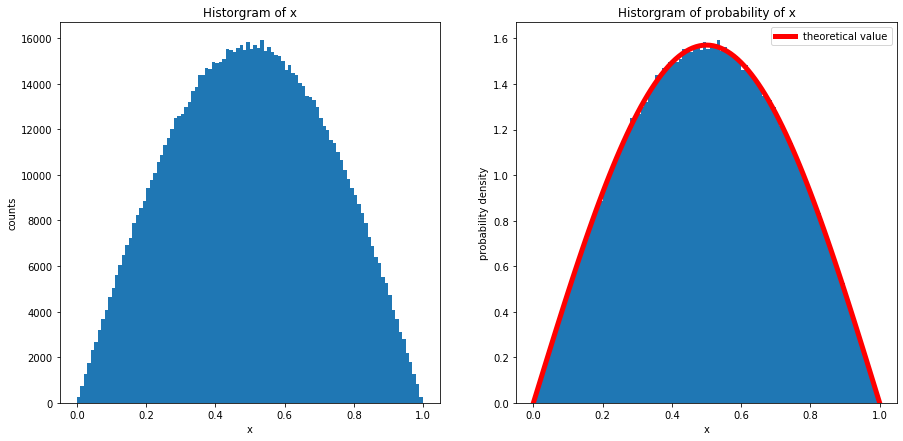

In [3]:
y = np.random.uniform(0,1,1000000) # Genereate standard uniform distribution numbers in range [0, 1/pi]
x = (1/np.pi) *np.arccos(1-2*y)
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].hist(x,100)
ax[0].set_title('Historgram of x')
ax[0].set_xlabel('x')
ax[0].set_ylabel('counts')
n,bins,patches = ax[1].hist(x,100,density = True)
ax[1].set_title('Historgram of probability of x')
ax[1].set_xlabel('x')
ax[1].set_ylabel('probability density')
p = np.pi/2 * np.sin(np.pi*bins)
ax[1].plot(bins,p,'r',linewidth = 5.0,label = 'theoretical value')
ax[1].legend()
plt.show()

In [4]:
<font size = 4 color = black face = "Times New Roman"> 
From the graph, we can find that the result from the inverse transformation method agrees with the theoretical value well.

SyntaxError: invalid syntax (<ipython-input-4-73a0116818cc>, line 1)

### Problem 3 (毛亦嘉)

<font size = 4 color = black face = "Times New Roman"> Here we set 0 as the original point and we use "+1" and "-1" to show going right or going left ("+1" corresponds to going right, "-1" corresponds to going left). We also use a variable "sign" which is a random number between 0 and 1. Since $p_{left} = 0.25$ and $p_{right} = 0.75$, if $0 \leq sign < 0.25$, we let it go left, and if $0.25 \leq sign <1$, we let the point go right. Firstly, let's do a random walk with step 1000.

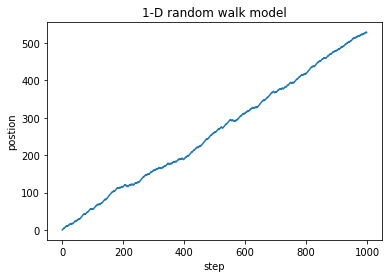

In [5]:
y_0 = 0
position = [y_0]
N = np.arange(1000) # Choose the step of the random walk as 10000
for step in range(1,1000): # N = 0 corresponds to y_0
    sign = np.random.rand(1) # Set a random number between 0 and 1
    if 0<=sign<0.25: # The probability to go left
        y_0 -= 1
    if 0.25<=sign<1: # The probability to go right
        y_0 += 1
    position.append(y_0)
plt.plot(N,position)
plt.xlabel('step')
plt.ylabel('postion')
plt.title('1-D random walk model')
plt.show()

<font size = 4 color = black face = "Times New Roman"> We can find that though the result has some fluctuation, the random walk generally goes to right(since $p_{left} < p_{right}$). Then we repeat the result for multiple times with different number of steps to check whether the final position is diffusive.

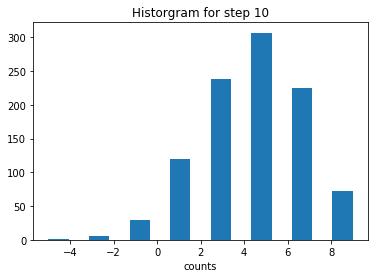

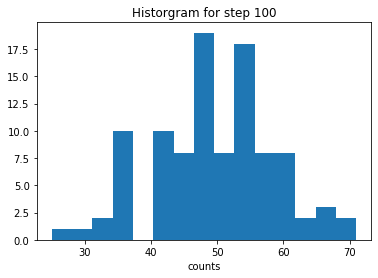

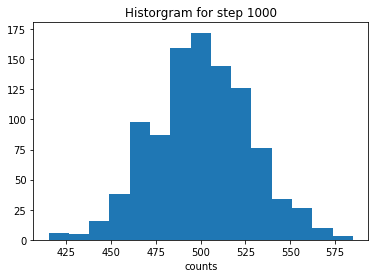

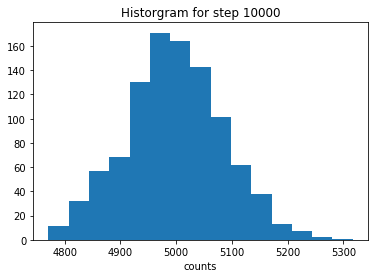

In [6]:
final_position = []
for times in range(1000):
    y_0 =0
    for step in range(1,10): # Choose the step of the random walk as 10000, N = 0 corresponds to y_0
        sign = np.random.rand(1) # Set a random number between 0 and 1
        if 0<=sign<0.25: # The probability to go left
            y_0 -= 1
        if 0.25<=sign<1: # The probability to go right
            y_0 += 1
    final_position.append(y_0)
plt.hist(final_position,15)
plt.xlabel('final position')
plt.xlabel('counts')
plt.title('Historgram for step 10')
plt.show()

final_position = []
for times in range(100):
    y_0 =0
    for step in range(1,100): # Choose the step of the random walk as 10000, N = 0 corresponds to y_0
        sign = np.random.rand(1) # Set a random number between 0 and 1
        if 0<=sign<0.25: # The probability to go left
            y_0 -= 1
        if 0.25<=sign<1: # The probability to go right
            y_0 += 1
    final_position.append(y_0)
plt.hist(final_position,15)
plt.xlabel('final position')
plt.xlabel('counts')
plt.title('Historgram for step 100')
plt.show()

final_position = []
for times in range(1000):
    y_0 =0
    for step in range(1,1000): # Choose the step of the random walk as 10000, N = 0 corresponds to y_0
        sign = np.random.rand(1) # Set a random number between 0 and 1
        if 0<=sign<0.25: # The probability to go left
            y_0 -= 1
        if 0.25<=sign<1: # The probability to go right
            y_0 += 1
    final_position.append(y_0)
plt.hist(final_position,15)
plt.xlabel('final position')
plt.xlabel('counts')
plt.title('Historgram for step 1000')
plt.show()

final_position = []
for times in range(1000):
    y_0 =0
    for step in range(1,10000): # Choose the step of the random walk as 10000, N = 0 corresponds to y_0
        sign = np.random.rand(1) # Set a random number between 0 and 1
        if 0<=sign<0.25: # The probability to go left
            y_0 -= 1
        if 0.25<=sign<1: # The probability to go right
            y_0 += 1
    final_position.append(y_0)
plt.hist(final_position,15)
plt.xlabel('final position')
plt.xlabel('counts')
plt.title('Historgram for step 10000')
plt.show()

<font size = 4 color = black face = "Times New Roman"> From the four graphs above, we can find that though it generally goes to right, the results for the final position is still diffusive. The inequality in step directions actually causes a drift in the distribution shown above, from the most probable final position, which is about 5, 50, 500 and 5000 corresponding to step N =10, 100, 1000 and 10000, we can find that the drift is propotional to the number of steps and the coefficient is related to the difference of the probability of two step directions.

### Problem 4 (洪图)

(1)

In [7]:
def xy_generator():
    delta_x = 2 * np.random.random_sample() - 1 #region(-1, 1)
    delta_y = 2 * np.random.random_sample() - 1
    L = np.sqrt(delta_x**2 + delta_y**2)
    
    # print(delta_x, delta_y, L)
    
    delta_x = delta_x / L
    delta_y = delta_y / L
    
    # print(delta_x, delta_y, L, delta_x**2 + delta_y**2)
    
    return delta_x, delta_y

In [8]:
xy_generator()

(0.7081038241300955, -0.7061083303943769)

(2)

In [10]:
def coordinate_generator(N):
    x = np.zeros(N)
    y = np.zeros(N)
    for i in range(1, N):
        delta_x, delta_y = xy_generator()
        x[i] = x[i-1] + delta_x
        y[i] = y[i-1] + delta_y 
    return x, y

In [11]:
def plot_generator(N):
    x, y = coordinate_generator(N)    
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('2-D random walk')

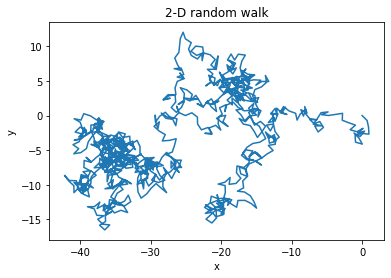

In [12]:
plot_generator(N = 1000)

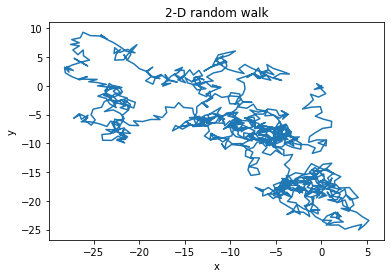

In [13]:
plot_generator(N = 1000)

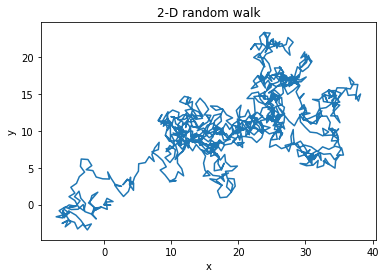

In [14]:
plot_generator(N = 1000)

(3)

In [15]:
def K_trial(N):
    K = int(np.sqrt(N))

    x_final = np.zeros(K)
    y_final = np.zeros(K)

    for i in range(K):
        for j in range(1, N):
            delta_x, delta_y = xy_generator()
            x_final[i] = x_final[i] + delta_x
            y_final[i] = y_final[i] + delta_y 

        
    #for i in range(K):
        #x, y = coordinate_generator(N)
        #x_final[i] = x[-1]
        #y_final[i] = y[-1]
    
    # print(x_final, y_final)
    # print(x_final,x_final**2, np.sum(x_final**2), np.sum(x_final**2)/K)
    
    R2_average = np.sum(x_final**2 + y_final**2) / K
    # print(R2_average)
    return R2_average

In [16]:
K_trial(N = 1000)

826.2431882456107

(4)

In [17]:
N_test = np.array([i**2 for i in range(1, 100)])
K_test = np.zeros(len(N_test))
for i in range(len(N_test)):
    K_test[i] = K_trial(N_test[i])

Text(0.5, 1.0, 'R-N')

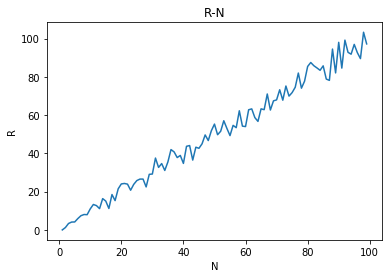

In [18]:
plt.plot(np.sqrt(N_test), np.sqrt(K_test))
plt.xlabel('N')
plt.ylabel('R')
plt.title('R-N')

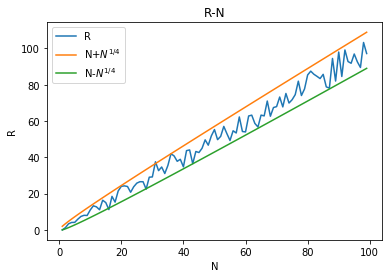

In [19]:
plt.plot(np.sqrt(N_test), np.sqrt(K_test),label = 'R')
#plt.plot(np.sqrt(N_test), np.sqrt(K_test)+np.sqrt(np.sqrt(N_test)))
#plt.plot(np.sqrt(N_test), np.sqrt(K_test)-np.sqrt(np.sqrt(N_test)))
plt.plot(np.sqrt(N_test), np.sqrt(N_test) + N_test**(1/4),label = 'N+$N^{1/4}$')
plt.plot(np.sqrt(N_test), np.sqrt(N_test) - N_test**(1/4),label = 'N-$N^{1/4}$')
plt.xlabel('N')
plt.ylabel('R')
plt.title('R-N')
plt.legend()

### Problem 5 （黄家乐）

#### Question 1

<font size = 4 color = black face = "Times New Roman"> And We know that $n(t) = \frac{N}{2}(1 + e^{-2t/N})$,hence $t \propto -\ln(n \frac{N}{2})$, and the factor should be $-\frac{2}{N}.$

In [20]:
#define the initial values
N = 10000
n = [N]
t = 0
# Calculated n depends on  t
while t < 10000:
    r = np.random.random()
    p = n[t] / N
    if r <= p:
        n.append(n[t] - 1)
    else:
        n.append(n[t] + 1)
    t += 1
t = np.arange(0,10001,1)

In [21]:
#define the theoretical function
def n_function(N,t):
    return N/2*(1 + np.exp(-2 * t / N))

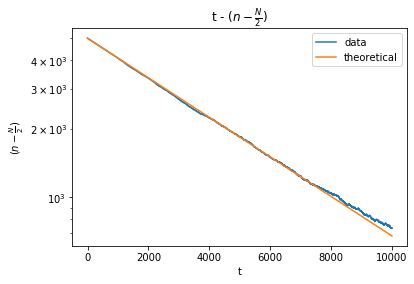

In [22]:
n_array = np.array(n) - N / 2
plt.semilogy(t,n_array)
plt.semilogy(t,n_function(N,t) - N / 2)
plt.xlabel('t')
plt.ylabel(r'$(n - \frac{N}{2})$')
plt.legend(['data','theoretical'])
plt.title(r't - $(n - \frac{N}{2})$')
plt.show()

In [23]:
# linear fit
a, b = np.polyfit(t , np.log(n_array),1)
print(f'The factor is {a:.4f}')

The factor is -0.0002


<font size = 4 color = black face = "Times New Roman">The theoretical factor is $-\frac{2}{N} = -0.0002$,hence ,we can confirm that the time dependence of $n$ appear to be deterministic for sufficient large $N$. The function should be $n(t) = \frac{N}{2}(1 + e^{-2t/N})$

#### Question 2 

In [24]:
def move_function(N):
    #define the initial values
    n = N
    t = 0
    while n != N/2:
        r = np.random.random()
        p = n /N
        if r <= p:
            n = n - 1
        else:
            n = n + 1
        t += 1
    return t

In [25]:
N = [8,16,64,400,800,3600]
t = []
j = 0
for i in N:
    t.append(move_function(i))
    print(f'When N = {N[j]}, it takes {t[j]} unit times to reach equilibrium.')
    j += 1

When N = 8, it takes 8 unit times to reach equilibrium.
When N = 16, it takes 8 unit times to reach equilibrium.
When N = 64, it takes 176 unit times to reach equilibrium.
When N = 400, it takes 608 unit times to reach equilibrium.
When N = 800, it takes 1648 unit times to reach equilibrium.
When N = 3600, it takes 7064 unit times to reach equilibrium.


In [26]:
N = np.arange(8,3602,2)
t = []
for i in N:
    t.append(move_function(i))

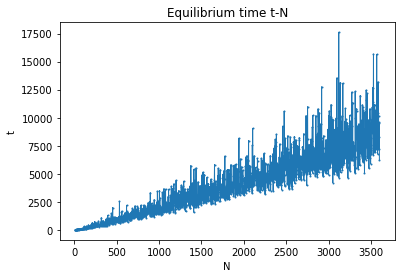

In [27]:
plt.plot(N,t,'-o',lw='1',ms='1')
plt.xlabel('N')
plt.ylabel('t')
plt.title('Equilibrium time t-N')
plt.show()

<font size = 4 color = black face = "Times New Roman">This time is positively correlated with the number of particles

#### Question 3

In [29]:
def measure_function(N=1000):
    n = [N/2]
    t = 0
# Calculated n depends on  t
    while t < 10000:
        r = np.random.random()
        p = n[t] / N
        if r <= p:
            n.append(n[t] - 1)
        else:
            n.append(n[t] + 1)
        t += 1
    return n

In [30]:
N_list = [8,16,64,400,800,3600]
n = []
i = 0
for N in N_list:
    n.append(measure_function(N_list[i]))
    i += 1

In [31]:
aver_n_2 = (np.array(n)**2).mean(axis=1)
aver_n = np.array(n).mean(axis=1)
dleat_n = aver_n_2 - aver_n**2

In [32]:
for  i in range(len(N_list)):
    print(f'When N = {N_list[i]} , delta n_square = {dleat_n[i]} ')

When N = 8 , delta n_square = 1.983240772013188 
When N = 16 , delta n_square = 4.111582002483686 
When N = 64 , delta n_square = 16.079284022402703 
When N = 400 , delta n_square = 90.36561809272098 
When N = 800 , delta n_square = 111.38037153190817 
When N = 3600 , delta n_square = 330.991279033944 


In [33]:
r_flu = np.sqrt(dleat_n) / aver_n

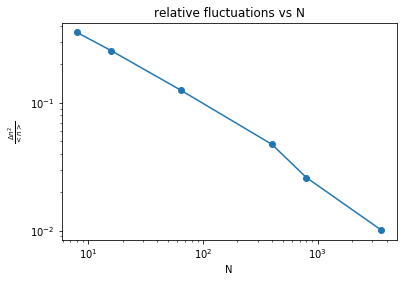

In [34]:
plt.loglog(N_list,r_flu,'-o')
plt.xlabel('N')
plt.ylabel(r'$\frac{\Delta n^2}{<n>}$')
plt.title('relative fluctuations vs N')
plt.show()

<font size = 4 color = black face = "Times New Roman"> From this figure we are easy to know that when N is larger, $\frac{\Delta n^2}{<n>}$ is smaller.

### Problem 6 （黄家乐）

In [35]:
N = 100000
# Generates positions of dart.
dart_positions = np.random.rand(N, 2)

In [36]:
# Get the distance between each dart and origin
distance = np.linalg.norm(dart_positions,axis = 1)

In [37]:
# The number of darts that insder the circle for N = 1,2,3... 10000
inside = np.cumsum(distance < 1)

In [38]:
numbers = np.arange(1, N+1, 1)

In [39]:
# calculate pi
calculated_pi = 4 * inside / numbers
pi = np.pi

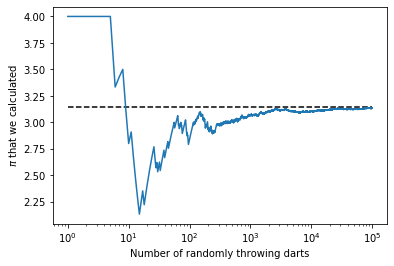

When N = 10000 the calculated pi = 3.13


In [40]:
fig,ax = plt.subplots()
plt.semilogx(numbers, calculated_pi)
ax.hlines(y = np.pi, xmin = 1, xmax = N+1, linestyle='--') 
plt.xlabel('Number of randomly throwing darts')
plt.ylabel(r'$\pi$ that we calculated')
plt.show()
print(f'When N = 10000 the calculated pi = {calculated_pi[-1]:.3}')

<font size = 4 color = black face = "Times New Roman">Hence we have gotten the right value of $\pi$, when N is large enough.

In [41]:
def repeat_experiment(count = 1000, N = 5000):
    calculated_pi = []
    for i in range(count):
        dart_positions = np.random.rand(N, 2)
        distance = np.linalg.norm(dart_positions,axis = 1)
        inside = len(distance[distance < 1])
        calculated_pi.append(4 * inside / N)

    return np.var(calculated_pi), np.mean(calculated_pi)

In [42]:
print(f'When N = 5000 repeat 1000 times , average value is {repeat_experiment()[1]:.3f} , the standar deviation is {repeat_experiment()[0]}')

When N = 5000 repeat 1000 times , average value is 3.141 , the standar deviation is 0.0005155290105599993
